# CV Lab 6

#### Student number: 1717212

---

In [1]:
import cv2 as cv
from glob import glob
import imageio as iio
import math
import matplotlib.pyplot as plt
%matplotlib inline
import mpmath
from natsort import natsorted
import numpy as np
import PIL
from pathlib import Path
import scipy.stats
import seaborn as sns
import skimage
from skimage import img_as_float32
from skimage.color import rgb2gray, rgb2hsv

#### Helper functions

In [2]:
def contrast_stretch(image):
    return (image - image.mean(axis=(0,1))) / image.std(axis=(0,1))

Load the images and masks

In [3]:
# load images and masks
path_pairs = list(zip(
    natsorted(glob('./puzzle_corners_1024x768/images-1024x768/*.png')),
    natsorted(glob('./puzzle_corners_1024x768/masks-1024x768/*.png')),
))

imgs = np.array([img_as_float32(iio.imread(ipath)) for ipath, _ in path_pairs])
msks = np.array([img_as_float32(iio.imread(mpath)) for _, mpath in path_pairs])

### 1 Find Contours

#### Question 1.1

In [4]:
def get_puzzle_contour(mask):
    contours, _ = cv.findContours(mask.astype(np.uint8), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv.contourArea, reverse=True) # sort by contour area
    return contours[0]

#### Question 1.2

In [5]:
def get_clockwise_contour(contour):
    area = cv.contourArea(contour, oriented=True)
    if area < 0:
        return contour[::-1]
    return contour

#### Question 1.3

cv.findContours

*[Read Topological structural analysis of digitized binary images by border following]*

cv.contourArea

*[Read https://mathinsight.org/greens_theorem_find_area#:%7E:text=We%20can%20parametrized%20it%20in,dt%3D%CF%80r2.]*

#### Question 1.4

Helper function to get images with contours plotted.

In [6]:
def plotContour(img, cntr):
    cntr = get_puzzle_contour(msks[i]) # get image contour
    tmp = imgs[i].copy() # copy image since cv.drawContours modifies the image passed to it
    cntrd = cv.drawContours(tmp, [cntr], 0, (0, 1, 0), 3)
    
    return cntrd

Plot contours

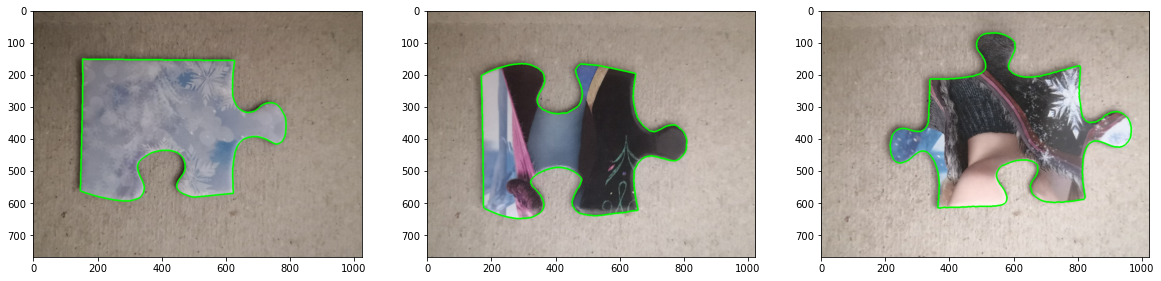

In [8]:
fig = plt.figure(figsize=(20, 12))
for i in range(3):
    fig.add_subplot(1, 3, i+1)
    cntrd = plotContour(imgs[i], get_puzzle_contour(msks[i])) # get image conours
    
    plt.imshow(cntrd)

---

### 2 Shape Models